In [1]:
!pip install pandas
!pip install seaborn
!pip install librosa



import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import librosa 
import librosa.display
from IPython.display import Audio
import warnings
warnings.filterwarnings("ignore")

In [15]:
paths = []
labels = []

for dirname, _, filenames in os.walk(r"C:\Users\Arya\Downloads\cnn\speech\TESS Toronto emotional speech set data"):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
        
        label = filename.split('_')[-1]
        label = label.split('.')[0]
        labels.append(label.lower())
print('Dataset is Loaded')        


Dataset is Loaded


In [17]:
paths[:5]

['C:\\Users\\Arya\\Downloads\\cnn\\speech\\TESS Toronto emotional speech set data\\OAF_angry\\OAF_back_angry.wav',
 'C:\\Users\\Arya\\Downloads\\cnn\\speech\\TESS Toronto emotional speech set data\\OAF_angry\\OAF_bar_angry.wav',
 'C:\\Users\\Arya\\Downloads\\cnn\\speech\\TESS Toronto emotional speech set data\\OAF_angry\\OAF_base_angry.wav',
 'C:\\Users\\Arya\\Downloads\\cnn\\speech\\TESS Toronto emotional speech set data\\OAF_angry\\OAF_bath_angry.wav',
 'C:\\Users\\Arya\\Downloads\\cnn\\speech\\TESS Toronto emotional speech set data\\OAF_angry\\OAF_bean_angry.wav']

In [19]:
labels[:5]

['angry', 'angry', 'angry', 'angry', 'angry']

In [21]:
#create a datafram 
df = pd.DataFrame()
df['speech'] = paths
df['label'] = labels
df.head()

,speech,label
0,C:\Users\Arya\Downloads\cnn\speech\TESS Toront...,angry
1,C:\Users\Arya\Downloads\cnn\speech\TESS Toront...,angry
2,C:\Users\Arya\Downloads\cnn\speech\TESS Toront...,angry
3,C:\Users\Arya\Downloads\cnn\speech\TESS Toront...,angry
4,C:\Users\Arya\Downloads\cnn\speech\TESS Toront...,angry


In [23]:
df['label'].value_counts()

label
angry      400
disgust    200
fear       200
happy      200
neutral    200
ps         200
sad        200
Name: count, dtype: int64

<Axes: xlabel='label', ylabel='count'>

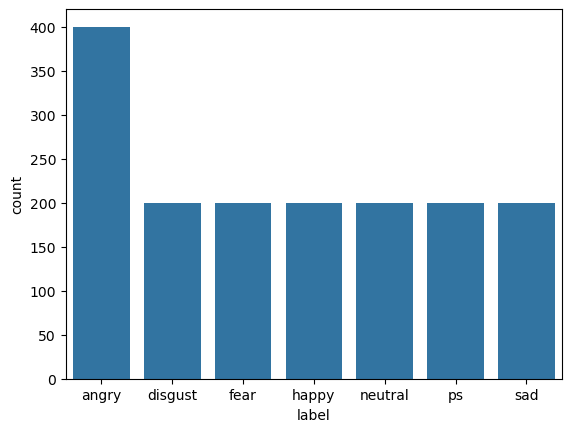

In [25]:
# Expolatary data analysis

sns.countplot(x='label', data=df)

In [27]:
print(df.columns)

Index(['speech', 'label'], dtype='object')


In [29]:
def waveplot(data,sr,emotion):
    plt.figure(figsize=(10, 5))
    librosa.display.waveplot(data, sr=sr)
    plt.show()
def spectogram(data,sr,emotion):
    x =librosa.stft(data)
    Xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(10, 5))
    plt.title(emotion,size=20)
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz', cmap='coolwarm')
    plt.colorbar()

    emotion = 'fear'
    path = df['speech'][df['label'] == emotion].iloc[0] 
    data, sampling_rate = librosa.load(path)
    waveplot(data,sampling_rate,emotion)
    spectogram(data,sampling_rate,emotion)
    Audio()

In [31]:
emotion = 'fear'
filtered_speech = df['speech'][df['label'] == emotion]
print(filtered_speech)  # Verify if any entries exist for the emotion 'fear'

400    C:\Users\Arya\Downloads\cnn\speech\TESS Toront...
401    C:\Users\Arya\Downloads\cnn\speech\TESS Toront...
402    C:\Users\Arya\Downloads\cnn\speech\TESS Toront...
403    C:\Users\Arya\Downloads\cnn\speech\TESS Toront...
404    C:\Users\Arya\Downloads\cnn\speech\TESS Toront...
                             ...                        
595    C:\Users\Arya\Downloads\cnn\speech\TESS Toront...
596    C:\Users\Arya\Downloads\cnn\speech\TESS Toront...
597    C:\Users\Arya\Downloads\cnn\speech\TESS Toront...
598    C:\Users\Arya\Downloads\cnn\speech\TESS Toront...
599    C:\Users\Arya\Downloads\cnn\speech\TESS Toront...
Name: speech, Length: 200, dtype: object


In [33]:
if not filtered_speech.empty:
    path = filtered_speech.iloc[0]
    print("Audio path:", path)  # Verify the path is correct

Audio path: C:\Users\Arya\Downloads\cnn\speech\TESS Toronto emotional speech set data\OAF_Fear\OAF_back_fear.wav


In [35]:
import librosa.display
import matplotlib.pyplot as plt

def waveplot(data, sr, emotion):
    plt.figure(figsize=(10, 5))
    librosa.display.waveshow(data, sr=sr)  # Updated function
    plt.title(f'Waveplot for {emotion} emotion')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.show()

In [37]:
import librosa.display
import matplotlib.pyplot as plt

def waveplot(data, sr, emotion):
    plt.figure(figsize=(10, 5))
    librosa.display.waveshow(data, sr=sr)  # Updated function
    plt.title(f'Waveplot for {emotion} emotion')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.show()

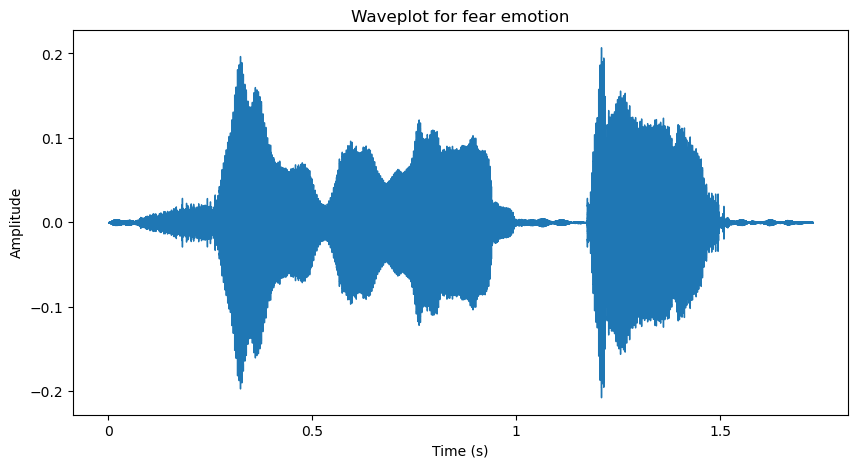

In [39]:
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)

In [41]:
def spectrogram(data, sr, emotion):
    plt.figure(figsize=(10, 5))
    
    # Create a spectrogram using librosa
    D = librosa.amplitude_to_db(librosa.stft(data), ref=np.max)
    
    # Display the spectrogram
    librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log')
    plt.title(f'Spectrogram for {emotion} emotion')
    plt.colorbar(format='%+2.0f dB')
    plt.show()

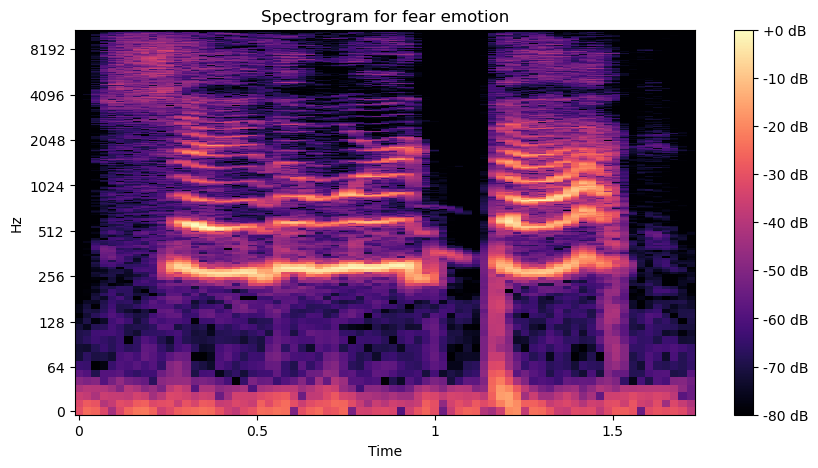

In [43]:
spectrogram(data, sampling_rate, emotion)

In [45]:
Audio(path)

In [47]:
import os

file_path = df['speech'][0]
if not os.path.exists(file_path):
    print(f"File not found: {file_path}")
else:
    print(f"File exists at: {file_path}")

File exists at: C:\Users\Arya\Downloads\cnn\speech\TESS Toronto emotional speech set data\OAF_angry\OAF_back_angry.wav


In [49]:
df['speech'] = df['speech'].apply(lambda x: x if x.endswith(('.wav')) else None)
df = df.dropna(subset=['speech'])  # Drop rows where the 'speech' column is now None

In [51]:
# Check the structure of the DataFrame
print(df.shape)  # Should show (rows, columns)

# Display the first few rows
print(df.head())

(1600, 2)
                                              speech  label
0  C:\Users\Arya\Downloads\cnn\speech\TESS Toront...  angry
1  C:\Users\Arya\Downloads\cnn\speech\TESS Toront...  angry
2  C:\Users\Arya\Downloads\cnn\speech\TESS Toront...  angry
3  C:\Users\Arya\Downloads\cnn\speech\TESS Toront...  angry
4  C:\Users\Arya\Downloads\cnn\speech\TESS Toront...  angry


In [53]:
# Access the first row using iloc to avoid KeyError
file_path = df.iloc[0]['speech']
print(f"File exists at: {file_path}")

File exists at: C:\Users\Arya\Downloads\cnn\speech\TESS Toronto emotional speech set data\OAF_angry\OAF_back_angry.wav


In [55]:
import os

# Check if the first file path exists
if os.path.exists(file_path):
    print(f"File exists: {file_path}")
else:
    print(f"File does not exist: {file_path}")

File exists: C:\Users\Arya\Downloads\cnn\speech\TESS Toronto emotional speech set data\OAF_angry\OAF_back_angry.wav


In [57]:
def extract_mfcc(filename):
    y, sr = librosa.load(filename, duration=3, offset=0.5)
    mfccs = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
    return mfccs

In [59]:
# Define the function to extract MFCC features
def extract_mfcc(filename):
    try:
        y, sr = librosa.load(filename, duration=3, offset=0.5)
        mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
        return mfcc
    except Exception as e:
        print(f"Error processing file {filename}: {e}")
        return None

# Apply the function to each file path in the 'speech' column
df['mfcc'] = df['speech'].apply(lambda x: extract_mfcc(x))

# Check the result
print(df.head())

                                              speech  label  \
0  C:\Users\Arya\Downloads\cnn\speech\TESS Toront...  angry   
1  C:\Users\Arya\Downloads\cnn\speech\TESS Toront...  angry   
2  C:\Users\Arya\Downloads\cnn\speech\TESS Toront...  angry   
3  C:\Users\Arya\Downloads\cnn\speech\TESS Toront...  angry   
4  C:\Users\Arya\Downloads\cnn\speech\TESS Toront...  angry   

                                                mfcc  
0  [-396.9862, 77.44054, -19.59279, -21.666689, -...  
1  [-465.73267, 98.77373, 0.6560085, -32.74544, -...  
2  [-429.79196, 46.12401, 1.5550478, -0.21709476,...  
3  [-403.46118, 76.32369, -12.531775, -22.288858,...  
4  [-434.05756, 77.4455, 10.8654995, 16.092943, 8...  


In [62]:
X_mfcc = df['speech'].apply(lambda x: extract_mfcc(x))

In [64]:
X_mfcc


0       [-396.9862, 77.44054, -19.59279, -21.666689, -...
1       [-465.73267, 98.77373, 0.6560085, -32.74544, -...
2       [-429.79196, 46.12401, 1.5550478, -0.21709476,...
3       [-403.46118, 76.32369, -12.531775, -22.288858,...
4       [-434.05756, 77.4455, 10.8654995, 16.092943, 8...
                              ...                        
1595    [-344.0832, 34.097153, -7.4219675, 17.877491, ...
1596    [-333.38745, 63.86061, -3.2831585, 17.142275, ...
1597    [-336.45566, 42.530975, -2.9627407, 1.36775, -...
1598    [-332.07935, 58.7289, -12.947717, 25.807829, -...
1599    [-417.4327, 40.14167, 12.793278, 25.56683, -14...
Name: speech, Length: 1600, dtype: object

In [66]:
X =[x for x in X_mfcc]

X = np.array(X)

X.shape

(1600, 40)

In [68]:
## input split 
X = np.expand_dims(X, -1)
X.shape 

(1600, 40, 1)

In [70]:
!pip install keras

In [72]:
!pip install tensorflow

In [74]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y = enc.fit_transform(df[['label']])

In [76]:
y=y.toarray()

In [78]:
y.shape

(1600, 7)

In [80]:
from keras.models import Sequential
from keras.layers import Dense , LSTM ,Dropout

model = Sequential([
    LSTM(123,return_sequences=False , input_shape=(40,1)),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(7, activation='softmax')
    
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 123)                 │          61,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │           7,936 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 7)                   │             231 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 71,747 (280.26 KB)

 Trainable params: 71,747 (280.26 KB)

 Non-trainable params: 0 (0.00 B)

In [82]:
# TRAIN THE MODEL 
history =model.fit(X,y, validation_split=0.2,epochs=100,batch_size=512,shuffle=True)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 723ms/step - accuracy: 0.1570 - loss: 1.9469 - val_accuracy: 0.1219 - val_loss: 1.9335
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 417ms/step - accuracy: 0.2589 - loss: 1.7974 - val_accuracy: 0.2500 - val_loss: 1.9741
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 430ms/step - accuracy: 0.3229 - loss: 1.6881 - val_accuracy: 0.4938 - val_loss: 1.9210
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 413ms/step - accuracy: 0.3792 - loss: 1.5935 - val_accuracy: 0.6094 - val_loss: 1.7868
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 412ms/step - accuracy: 0.4306 - loss: 1.4998 - val_accuracy: 0.6156 - val_loss: 1.6707
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 459ms/step - accuracy: 0.4313 - loss: 1.3916 - val_accuracy: 0.6125 - val_loss: 1.5763
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 411ms/step - accuracy: 0.4584 - loss: 1.3085 - val_accuracy: 0.6000 - val_loss: 1.5174
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 386ms/step - accuracy: 0.5369 - loss: 1.2156 - val_accuracy: 0.5875 - v

In [88]:
import sounddevice as sd
from scipy.io.wavfile import write

fs = 22050  # Sampling frequency (same as your dataset)
seconds = 3  # Duration of recording

print("Recording...")
audio_data = sd.rec(int(seconds * fs), samplerate=fs, channels=1, dtype='int16')
sd.wait()  # Wait until recording is finished
write("test_audio.wav", fs, audio_data)  # Save the recorded file
print("Recording complete!")

# Play back the recorded audio
sd.play(audio_data, fs)
sd.wait()  # Wait until the playback is finished
print("Playback complete!")


Recording...
Recording complete!
Playback complete!


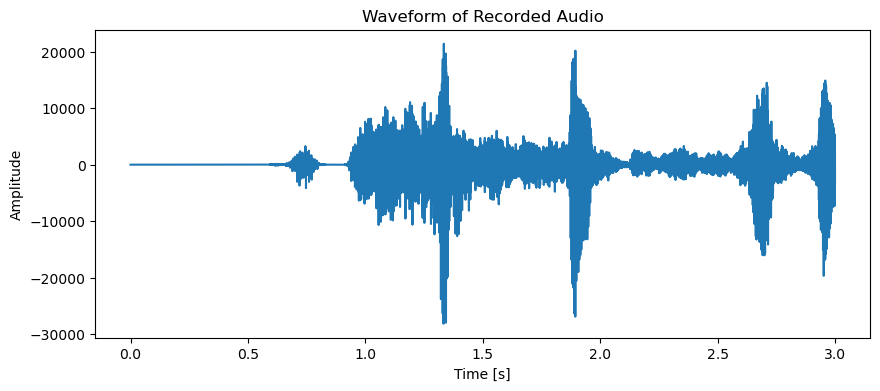

In [90]:
import matplotlib.pyplot as plt
import numpy as np

# Plot the waveform of the recorded audio
plt.figure(figsize=(10, 4))
plt.plot(np.linspace(0, seconds, len(audio_data)), audio_data)
plt.title("Waveform of Recorded Audio")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.show()


In [102]:
import librosa
import numpy as np

def extract_features(file_path):
    y, sr = librosa.load(file_path, sr=22050)  # Load the audio
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40)  # Extract MFCCs
    mfcc = np.mean(mfcc.T, axis=0)  # Take the mean along time axis
    return mfcc

# Extract features from the recorded audio
test_features = extract_features("test_audio.wav")

# Reshape to match the model's expected input shape (batch_size, timesteps, features)
test_features = test_features.reshape(1, 40, 1)


In [104]:
prediction = model.predict(test_features)
predicted_class = np.argmax(prediction, axis=1)[0]  # Get the class with highest probability
# Map the predicted class index to actual label names (modify as per your dataset)
class_labels = ["Angry", "Happy", "Neutral", "Sad", "Surprised", "Disgust", "Fear"]
print(f"Predicted Emotion: {class_labels[predicted_class]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
Predicted Emotion: Happy


In [123]:
!pip install SpeechRecognition

   ---------------------------------------- 0.0/32.9 MB ? eta -:--:--
   ---------------------------------------- 0.2/32.9 MB 5.3 MB/s eta 0:00:07
    --------------------------------------- 0.7/32.9 MB 9.1 MB/s eta 0:00:04
   - -------------------------------------- 1.3/32.9 MB 10.2 MB/s eta 0:00:04
   -- ------------------------------------- 1.6/32.9 MB 9.5 MB/s eta 0:00:04
   -- ------------------------------------- 2.0/32.9 MB 9.3 MB/s eta 0:00:04
   -- ------------------------------------- 2.5/32.9 MB 9.8 MB/s eta 0:00:04
   --- ------------------------------------ 2.8/32.9 MB 8.8 MB/s eta 0:00:04
   --- ------------------------------------ 3.2/32.9 MB 9.0 MB/s eta 0:00:04
   ---- ----------------------------------- 3.8/32.9 MB 9.4 MB/s eta 0:00:04
   ----- ---------------------------------- 4.4/32.9 MB 9.6 MB/s eta 0:00:03
   ----- ---------------------------------- 4.9/32.9 MB 9.8 MB/s eta 0:00:03
   ------ --------------------------------- 5.0/32.9 MB 9.1 MB/s eta 0:00:04
   --

In [11]:
from keras.models import load_model
import speech_recognition as sr
import sounddevice as sd
import numpy as np
from scipy.io.wavfile import write
import time
import pickle
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


In [13]:
# Load the pre-trained emotion detection model
model = load_model('emotion_model.h5')
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [15]:
# Load the pre-trained tokenizer
with open('tokenizer.pickle', 'rb') as handle:
    tokenizer = pickle.load(handle)

FileNotFoundError: [Errno 2] No such file or directory: 'tokenizer.pickle'

In [5]:
from keras.models import load_model
import speech_recognition as sr
import sounddevice as sd
import numpy as np
from scipy.io.wavfile import write
import time
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Step 2: Load the Model (for later use in speech-to-text processing)
model = load_model('emotion_model.h5')  # Load the pre-trained model

# Step 3: Record audio and convert speech to text
recognizer = sr.Recognizer()

# Function to record audio
def record_audio(duration=5, fs=22050):
    print("Recording...")
    audio_data = sd.rec(int(duration * fs), samplerate=fs, channels=1, dtype='int16')
    sd.wait()  # Wait until recording is finished
    write("test_audio.wav", fs, audio_data)  # Save the recorded file
    print("Recording complete!")
    return "test_audio.wav"

# Function for speech to text
def speech_to_text(audio_file):
    with sr.AudioFile(audio_file) as source:
        audio = recognizer.record(source)
    try:
        text = recognizer.recognize_google(audio)
        print(f"Recognized Text: {text}")
        return text
    except sr.UnknownValueError:
        print("Sorry, could not understand the audio")
        return ""
    except sr.RequestError:
        print("Could not request results from Google Speech Recognition service")
        return ""

# List of emotions corresponding to class indices (update this list as per your model's training)
emotion_labels = ["angry", "fear", "disgust", "sad", "happy", "surprise", "neutral"]

# Function to preprocess the text before prediction
def preprocess_text(text):
    # 1. Lowercase the text
    text = text.lower()
    
    # 2. Tokenize the text (convert words into numerical tokens)
    tokens = tokenizer.texts_to_sequences([text])  # Converting to sequence of tokens
    
    # 3. Pad the sequence (ensure consistent input size for your model)
    max_length = 100  # Adjust this based on the max length used during training
    padded_tokens = pad_sequences(tokens, maxlen=max_length, padding='post', truncating='post')
    
    return padded_tokens[0]  # Return the processed text features as an array

# Function to detect emotion
def detect_emotion_from_text(text):
    # Preprocess the text (tokenize, pad, etc.)
    text_features = preprocess_text(text)
    
    # Predict the emotion
    prediction = model.predict(np.array([text_features]))  # Pass preprocessed text
    predicted_class = np.argmax(prediction, axis=1)[0]  # Get the predicted emotion class
    
    # Map the class index to the corresponding emotion label
    predicted_emotion = emotion_labels[predicted_class]
    
    return predicted_emotion

# Main loop for recording, transcribing, and emotion detection
while True:
    # Step 1: Record audio
    audio_file = record_audio(duration=5)
    
    # Step 2: Convert speech to text
    text = speech_to_text(audio_file)
    
    if text:  # If the transcription was successful
        # Step 3: Detect emotion from the text
        emotion = detect_emotion_from_text(text)
        print(f"Detected Emotion: {emotion}")
    
    # Wait for a short time before recording again (optional)
    time.sleep(1)


Recording...
Recording complete!
Recognized Text: hello how are you I am fine


NameError: name 'tokenizer' is not defined